In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5707,45765788,470,1399,MERCEDES-BENZ,E 350,2010,Sedan,Yes,Diesel,3.5,229904 km,6,Automatic,4x4,4-May,Left wheel,Black,12
7611,45545360,21953,501,HONDA,FIT,2014,Sedan,Yes,Petrol,1.5,78400 km,4,Variator,Front,4-May,Left wheel,Blue,6
3893,45809964,29762,585,HONDA,Civic,2013,Sedan,Yes,Petrol,1.8,155465 km,4,Automatic,Front,4-May,Left wheel,Grey,4
1003,45647035,157,1104,AUDI,A6,2015,Sedan,Yes,Petrol,3,77333 km,6,Automatic,4x4,4-May,Left wheel,Grey,12
12132,45792165,16778,638,KIA,Optima,2014,Sedan,Yes,Petrol,2,40228 km,4,Automatic,Front,4-May,Left wheel,Silver,4
7400,45786818,8467,1111,HONDA,FIT,2012,Hatchback,No,Hybrid,1.3,60000 km,4,Variator,Front,4-May,Right-hand drive,Black,4
16408,45803578,8781,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,686233 km,4,Automatic,Front,4-May,Left wheel,Orange,4
6300,45801729,18240,583,HYUNDAI,Elantra,2011,Sedan,Yes,Petrol,1.6,119921 km,4,Automatic,Front,4-May,Left wheel,Grey,4
8088,45776444,13500,-,HONDA,Fred HIBRIDI,2012,Minivan,No,Hybrid,1.5,195000 km,4,Variator,Front,4-May,Right-hand drive,Black,6
1584,45707590,12858,-,TOYOTA,Aqua,2012,Hatchback,No,Hybrid,1.5,139000 km,4,Automatic,Front,4-May,Right-hand drive,Silver,6


In [104]:
train['logPrice'] = np.log(train.Price)

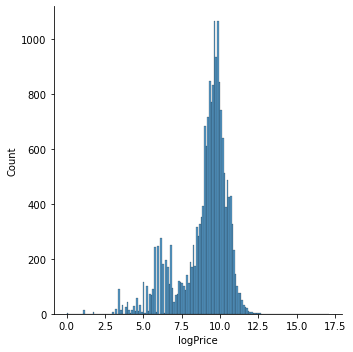

In [105]:
sns.displot(train.logPrice)

In [106]:
lowPrice = np.quantile(train.logPrice, 0.02)
highPrice = np.quantile(train.logPrice, 0.99)
print (lowPrice, highPrice)

4.700480365792417 11.346575677685973


<AxesSubplot:xlabel='cappedLogPrice', ylabel='Count'>

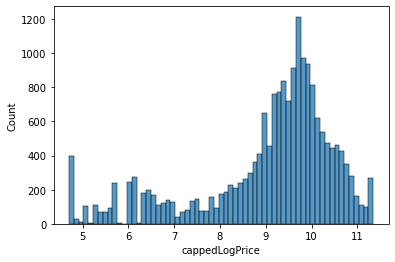

In [107]:
train['cappedLogPrice'] = train.logPrice
train.loc[train.logPrice < lowPrice, 'cappedLogPrice'] = lowPrice
train.loc[train.logPrice > highPrice, 'cappedLogPrice'] = highPrice
sns.histplot(train.cappedLogPrice)

<AxesSubplot:xlabel='cappedLogPrice'>

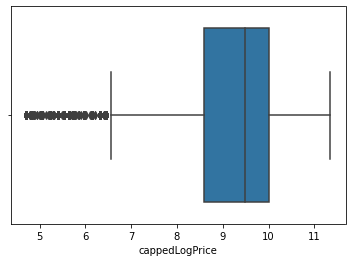

In [108]:
sns.boxplot(train.cappedLogPrice)

In [109]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'logPrice', 'cappedLogPrice'],
      dtype='object')

In [110]:
df_train = train.drop(columns=['ID', 'Price', 'logPrice'])
df_train.columns.to_list()

['Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'cappedLogPrice']

In [111]:
df_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,cappedLogPrice
0,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4,Manual,Rear,4-May,Left wheel,Beige,0,10.854102
1,-,GAZ,20,1953,Jeep,No,Petrol,3.2,100000 km,4,Manual,4x4,2-Mar,Left wheel,Green,0,8.070906
2,-,GAZ,21,1964,Sedan,No,Petrol,2.4,0 km,4,Manual,Rear,4-May,Left wheel,Sky blue,0,8.966994
3,-,GAZ,24,1990,Universal,Yes,Petrol,6.3,2000 km,8,Manual,4x4,2-Mar,Left wheel,Green,0,8.581294
4,-,AUDI,50,2018,Coupe,Yes,Petrol,0.5,4000 km,1,Tiptronic,Rear,>5,Right-hand drive,Blue,0,7.170120


In [112]:
cat_cols = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
           'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
num_cols = ['Levy', 'Prod. year', 'Engine volume', 
            'Airbags', 'Cylinders', 'Mileage']
print (len(df_train.columns.to_list()), 
        len(cat_cols),
        len(num_cols))

17 9 6


In [113]:
sorted(train.Doors.unique())

['2-Mar', '4-May', '>5']

In [114]:
top_manufacturers = df_train.Manufacturer.value_counts().head(20).reset_index()['index'].to_list()

In [176]:
df_train.loc[df_train.Levy=='-', 'Levy'] = 0
df_train.Mileage = train.Mileage.apply(lambda x: int(x[:-3]))
df_train.loc[df_train.Mileage==0, 'Mileage'] = None
df_train['Mileage'] = df_train['Mileage'].\
                        fillna(df_train.groupby('Prod. year')['Mileage'].transform('median'))
df_train.Mileage.fillna(df_train.Mileage.mean(), inplace=True)
df_train.Mileage = np.log(df_train.Mileage)

In [118]:
df_train[num_cols].head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage
0,0,1953,2,0,4,0
1,0,1953,3.2,0,4,100000
2,0,1964,2.4,0,4,0
3,0,1990,6.3,0,8,2000
4,0,2018,0.5,0,1,4000


In [119]:
df_train.Levy = df_train.Levy.astype(int)

In [120]:
df_train['Engine volume'] = df_train['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_train['Engine volume'] = df_train['Engine volume'].astype(float)

In [122]:
df_train.loc[~df_train.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
for col in cat_cols:
    print (col, ': ', len(df_train[col].unique()))

Manufacturer :  21
Category :  11
Leather interior :  2
Fuel type :  7
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16


In [123]:
df_dummies = pd.get_dummies(df_train[cat_cols], drop_first=True)
df_dummies.tail()

,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FORD,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LEXUS,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Modelling

In [177]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = pd.concat([df_train[num_cols], df_dummies], axis=1)
y = df_train.cappedLogPrice
X_cols = X.columns.to_list()

X_train, X_test, y_train, y_test = train_test_split(X[X_cols], y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_cols)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_cols)

In [178]:
X_train.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
7808,0,2004,1.3,2,4,11.976659,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16766,364,2012,1.0,4,4,11.982929,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7285,1493,2016,3.5,4,4,10.693739,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15712,891,2016,2.0,4,4,11.627691,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16562,0,2011,2.4,9,4,12.711926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


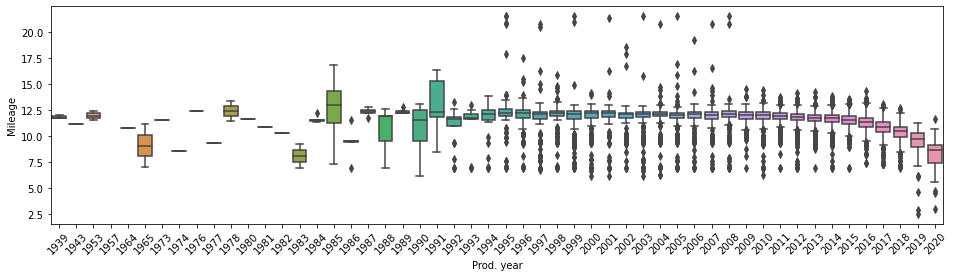

In [159]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='Mileage', x='Prod. year', data=X_train)
plt.xticks(rotation=45)
plt.show()

In [179]:
df_null = pd.DataFrame(X_train.isna().sum()).reset_index()
df_null.columns = ['Feature', 'isNull']
df_null.sort_values(by='isNull').tail()

,Feature,isNull
28,Category_Hatchback,0
29,Category_Jeep,0
30,Category_Limousine,0
16,Manufacturer_MAZDA,0
65,Color_Yellow,0


# Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(oob_score=True, random_state=42).fit(X_train_scaled, y_train)
rf_model.score(X_test_scaled, y_test)                              

0.6711008835222834

In [181]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_model.predict(X_test_scaled))))

0.8531149813910431

In [182]:
df_importance = pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'])
df_importance['Feature'] = X_cols
df_importance = df_importance[['Feature', 'Importance']].sort_values(by='Importance', ascending=False)
df_importance.head(15)


,Feature,Importance
3,Airbags,0.171911
5,Mileage,0.168733
1,Prod. year,0.118661
44,Gear box type_Tiptronic,0.103532
0,Levy,0.093764
2,Engine volume,0.053342
36,Leather interior_Yes,0.034798
38,Fuel type_Hybrid,0.022232
29,Category_Jeep,0.016316
64,Color_White,0.013535


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

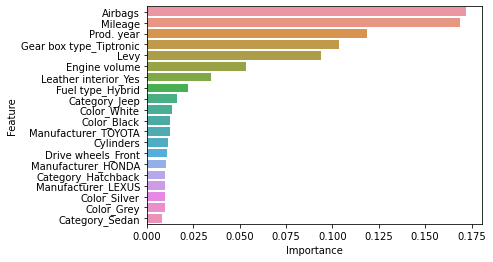

In [184]:
sns.barplot(x='Importance', y='Feature', data=df_importance.head(20))

---


In [131]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [192]:
df_test = test.drop(columns = 'ID')

df_test.loc[df_test.Levy=='-', 'Levy'] = 0
df_test.loc[df_test.Doors=='04-May', 'Doors'] = '4-May'
df_test.loc[df_test.Doors=='02-Mar', 'Doors'] = '2-Mar'

df_test.Mileage = df_test.Mileage.apply(lambda x: int(x[:-3]))
df_test.loc[df_test.Mileage==0, 'Mileage'] = None
df_test['Mileage'] = df_test['Mileage'].\
                        fillna(df_test.groupby('Prod. year')['Mileage'].transform('median'))
df_test.Mileage.fillna(df_test.Mileage.mean(), inplace=True)
df_test.Mileage = np.log(df_test.Mileage)

df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_test['Engine volume'] = df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

df_test.Levy = df_test.Levy.astype(int)
df_test.loc[df_test.Cylinders > 15, 'Cylinders'] = 15

df_test.loc[~df_test.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
df_dummies_test = pd.get_dummies(df_test[cat_cols], drop_first=True)

#############################################

X_submit = pd.concat([df_test[num_cols], df_dummies_test], axis=1)
X_submit_scaled = pd.DataFrame(scaler.transform(X_submit), columns=X_cols)
X_submit_scaled.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,-1.111134,0.191152,-0.348790,0.788730,-0.486096,0.257966,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,2.638409,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
1,-1.111134,0.191152,0.103422,0.788730,-0.486096,-1.413790,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,2.638409,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
2,-1.111134,-1.039436,-0.914055,0.326277,-0.486096,0.408518,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,12.824707,-0.549095,-0.074084
3,0.607795,0.191152,1.007846,1.251183,1.179761,0.251160,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084
4,-1.111134,-3.149016,-0.801002,-1.523534,-0.486096,0.578801,-0.240737,-0.242394,-0.069038,-0.069512,...,-0.129546,-0.379016,-0.118188,-0.036074,-0.043451,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084


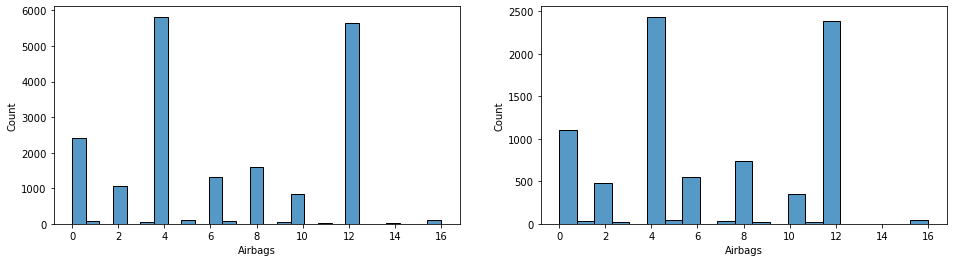

In [194]:
plt.figure(figsize=(16, 4))
plt.subplot(121); sns.histplot(df_train.Airbags)
plt.subplot(122); sns.histplot(df_test.Airbags)
plt.show()

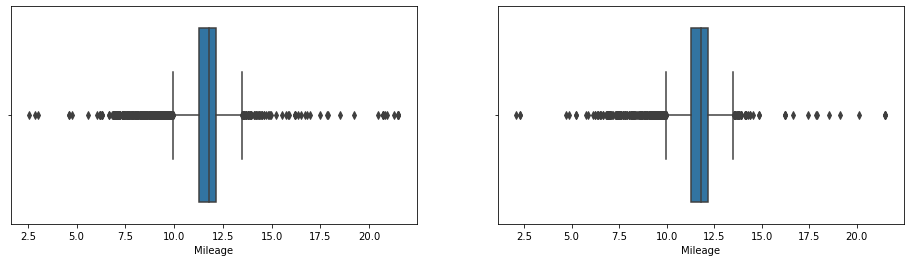

In [193]:
plt.figure(figsize=(16, 4))
plt.subplot(121); sns.boxplot(X_train.Mileage)
plt.subplot(122); sns.boxplot(X_submit.Mileage)
plt.show()

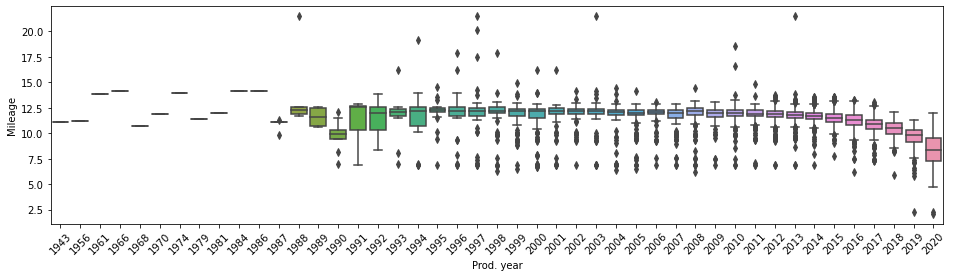

In [196]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='Mileage', x='Prod. year', data=X_submit)
plt.xticks(rotation=45)
plt.show()

In [197]:
X_submit.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,2012,2.0,10,4,11.877569,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2012,2.4,10,4,10.165852,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2005,1.5,8,4,12.031719,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,975,2012,3.2,12,6,11.870600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1993,1.6,0,4,12.206073,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


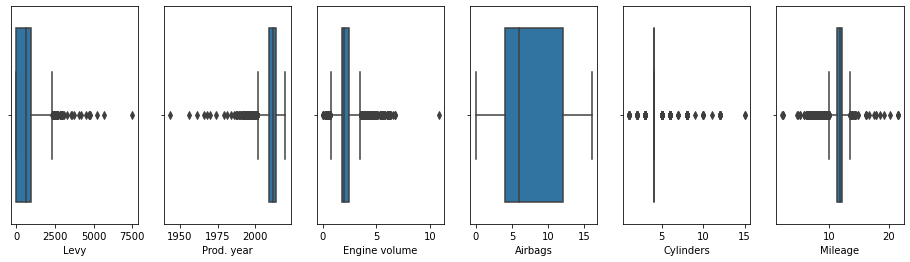

In [198]:
plt.figure(figsize=(16,4))
for col in num_cols:
    plt.subplot(1, len(num_cols), num_cols.index(col)+1)
    sns.boxplot(df_test[col])

In [199]:
y_submit = pd.DataFrame(np.round(np.exp(rf_model.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)